# Branching

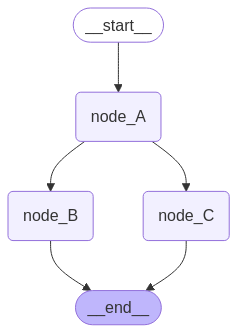

In [63]:
from typing_extensions import TypedDict
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

class State(TypedDict):
    state_field: str


def node_A(state):
    print("---Node A---")
    return {"state_field": "A"}

def node_B(state):
    print("---Node B---")
    return {"state_field": "B"}

def node_C(state):
    print("---Node C---")
    return {"state_field": "C"}

# Build graph
builder = StateGraph(State)
builder.add_node("node_A", node_A)
builder.add_node("node_B", node_B)
builder.add_node("node_C", node_C)

# Logic
builder.add_edge(START, "node_A")
builder.add_edge("node_A", "node_B")
builder.add_edge("node_A", "node_C")
builder.add_edge("node_B", END)
builder.add_edge("node_C", END)

# Add
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [67]:
# Q: Without running the code, what would be the output of this cell?
# graph.invoke({"state_field": "S"})

# Reducers

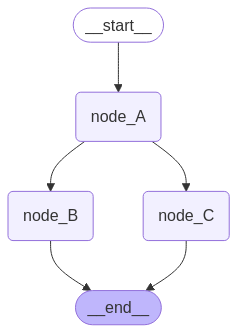

In [ ]:
from typing_extensions import TypedDict
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END
from operator import add
from typing import Annotated

class State(TypedDict):
    state_field: Annotated[str, add]   # <---- This is a reducer

def node_A(state):
    print("---Node A---")
    return {"state_field": "A"}

def node_B(state):
    print("---Node B---")
    return {"state_field": "B"}

def node_C(state):
    print("---Node C---")
    return {"state_field": "C"}


# Build graph
builder = StateGraph(State)
builder.add_node("node_A", node_A)
builder.add_node("node_B", node_B)
builder.add_node("node_C", node_C)

# Logic
builder.add_edge(START, "node_A")
builder.add_edge("node_A", "node_B")
builder.add_edge("node_A", "node_C")
builder.add_edge("node_B", END)
builder.add_edge("node_C", END)

# Add
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [1]:
# Q: Without running the code, what would be the output of this cell?
# graph.invoke({"state_field": "S"})

## You can write your own reducer:

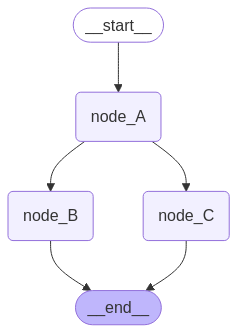

In [ ]:
from typing_extensions import TypedDict
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END
from typing import Annotated
from time import sleep

def custom_reducer(state, new_state):
    print(f"---Custom reducer--- `{state}`, `{new_state}`")
    return state + new_state


class State(TypedDict):
    state_field: Annotated[str, custom_reducer]

def node_A(state):
    print("---Node A--- state:", state)
    return {"state_field": "A"}

def node_B(state):
    # sleep(1)   <-- uncomment this to let node B run longer then C
    print("---Node B--- state:", state)
    return {"state_field": "B"}

def node_C(state):
    print("---Node C--- state:", state)
    return {"state_field": "C"}


# Build graph
builder = StateGraph(State)
builder.add_node("node_A", node_A)
builder.add_node("node_B", node_B)
builder.add_node("node_C", node_C)

# Logic
builder.add_edge(START, "node_A")
builder.add_edge("node_A", "node_B")
builder.add_edge("node_A", "node_C")
builder.add_edge("node_B", END)
builder.add_edge("node_C", END)

# Add
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [139]:
graph.invoke({"state_field": "S"})

---Custom reducer--- ``, `S`
---Node A--- state: {'state_field': 'S'}
---Custom reducer--- `S`, `A`
---Node C--- state: {'state_field': 'SA'}
---Node B--- state: {'state_field': 'SA'}
---Custom reducer--- `SA`, `B`
---Custom reducer--- `SAB`, `C`


{'state_field': 'SABC'}

In [1]:
# Q: How does the graph decide what should it reduce first: Node B or Node C?

# Task:

Write our own reducer and test it on this graph. Be creative.

Side notes:

Funny thing: the graph will reduce the nodes in lexical order: of the node names (not functions). 

The same logice could be applied if we don't have reducers at all: the state of the graph would then be the last node's state. 

But the creators of the library decided to avoid such hidden ambiguity.